In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# 数据加载

In [2]:
from sklearn.datasets.california_housing import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
features = pd.DataFrame(housing.data, columns=housing.feature_names)
labels = pd.DataFrame(housing.target, columns=["Price"])

In [4]:
df = pd.concat([features, labels], axis=1)
print(df.shape)

(20640, 9)


In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


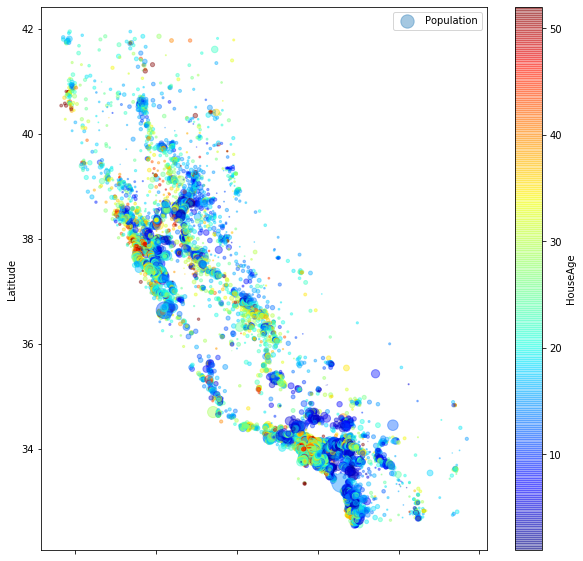

In [6]:
df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=.4,
            s=df.Population/100, label='Population',
            c='HouseAge', cmap=plt.get_cmap('jet'),colorbar=True,
            figsize=(10,10))
plt.legend()
plt.show()

# 树模型参数

-  1.criterion  gini  or  entropy

-  2.splitter  best or random 前者是在所有特征中找最好的切分点 后者是在部分特征中（数据量大的时候）

-  3.max_features  None（所有），log2，sqrt，N  特征小于50的时候一般使用所有的

-  4.max_depth  数据少或者特征少的时候可以不管这个值，如果模型样本量多，特征也多的情况下，可以尝试限制下

-  5.min_samples_split  如果某节点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。

-  6.min_samples_leaf  这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝，如果样本量不大，不需要管这个值，大些如10W可是尝试下5

-  7.min_weight_fraction_leaf 这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。

-  8.max_leaf_nodes 通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制具体的值可以通过交叉验证得到。

-  9.class_weight 指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。

- 10.min_impurity_split 这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值则该节点不再生成子节点。即为叶子节点 。
- n_estimators:要建立树的个数

In [7]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor(max_depth = 2)
dtr.fit(df[['Latitude', 'Longitude']], df.Price)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

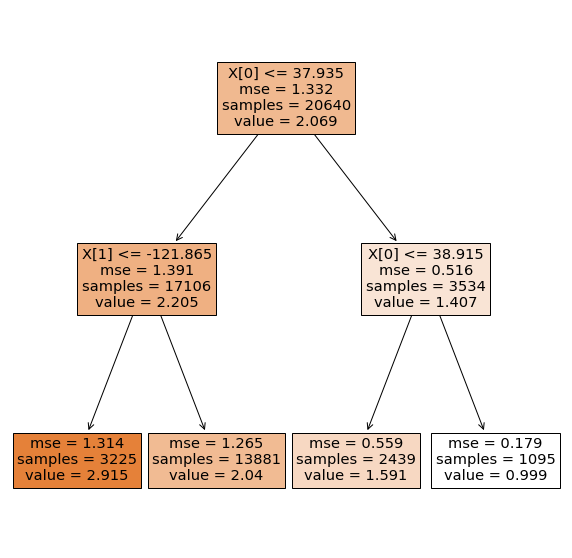

In [13]:
plt.figure(figsize=(10,10))
tree.plot_tree(dtr, filled=True)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = \
    train_test_split(housing.data, housing.target, test_size = 0.1, random_state = 42)
dtr = tree.DecisionTreeRegressor(random_state = 42)
dtr.fit(data_train, target_train)

dtr.score(data_test, target_test)

0.637355881715626

In [15]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor( random_state = 42)
rfr.fit(data_train, target_train)
rfr.score(data_test, target_test)

C:\Users\Administrator\Anaconda3\envs\nlp\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7910601348350835

In [17]:
from sklearn.model_selection import GridSearchCV
tree_param_grid = { 'min_samples_split': list((3,6,9)),'n_estimators':list((10,50,100))}
grid = GridSearchCV(RandomForestRegressor(),param_grid=tree_param_grid, cv=5)
grid.fit(data_train, target_train)

In [20]:
grid.cv_results_['params'], grid.best_params_, grid.best_score_

([{'min_samples_split': 3, 'n_estimators': 10},
  {'min_samples_split': 3, 'n_estimators': 50},
  {'min_samples_split': 3, 'n_estimators': 100},
  {'min_samples_split': 6, 'n_estimators': 10},
  {'min_samples_split': 6, 'n_estimators': 50},
  {'min_samples_split': 6, 'n_estimators': 100},
  {'min_samples_split': 9, 'n_estimators': 10},
  {'min_samples_split': 9, 'n_estimators': 50},
  {'min_samples_split': 9, 'n_estimators': 100}],
 {'min_samples_split': 3, 'n_estimators': 100},
 0.8072700367859098)

In [29]:
rfr = RandomForestRegressor(min_samples_split=3,n_estimators = 100,random_state = 42)
rfr.fit(data_train, target_train)
rfr.score(data_test, target_test)

0.80908290496531576

In [31]:
pd.Series(rfr.feature_importances_, index = housing.feature_names).sort_values(ascending = False)

MedInc        0.524257
AveOccup      0.137947
Latitude      0.090622
Longitude     0.089414
HouseAge      0.053970
AveRooms      0.044443
Population    0.030263
AveBedrms     0.029084
dtype: float64

# 集成学习
- Bagging: 训练多个分类器取平均
    - 通常用树模型做基础模型
    - 并行运行
    - 代表：随机森林
        - 能处理高唯独数据，不需要做特征选择
        - 有feature_importance_属性
        - 容易并行，速度快
        - 可视化
- Boosting: 从弱学习器开始加强，通过加权来进行训练
    - 串行运算
    - 代表：AdaBoost, Xgboost
- Stacking: 聚合多个分类器或回归模型

# 特征重要性衡量
计算原理，替换噪声计算比较结果差异，差异越大重要性越高